## Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import tqdm
import seaborn as sns

In [3]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(data.shape)
data.head(1)

(7007, 23)


,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6


In [4]:
real=pd.read_csv('test.csv')
real.shape

(2093, 22)

In [5]:
data.replace('?',np.nan,inplace=True)
real.replace('?',np.nan,inplace=True)

In [6]:
pp.ProfileReport(data)

__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ --------------------------------------
__dummy__ ----------

In [7]:
#Category Column from Lead_name
data['Category']=data.Lead_name.apply(lambda a:a.split()[-1])
real['Category']=real.Lead_name.apply(lambda a:a.split()[-1])
data.Category.value_counts()

Category --------------------------------------
Category --------------------------------------


LLC      1202
Group    1200
Ltd      1186
Sons     1180
Inc      1141
PLC      1098
Name: Category, dtype: int64

In [8]:
#Checking Industry null values
data[data.Industry.isna()]

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,Category
4653,Title232C0,"Valenzuela, Williamson and Henry and Sons",NaN,209418$,1266978.9$,2020-12-15,Product_2,737.346.8367,50 - 100 Million,Category 4,...,johnathanle@valenzuela.com,Landscape architect,Contact Email,Level 1,2 days back,"Hameier,Kurt E",No,3,56.6,Sons


In [9]:
data.Industry.value_counts

<bound method IndexOpsMixin.value_counts of 0                 Restaurants
1       Construction Services
2           Hospitals/Clinics
3                 Real Estate
4          Financial Services
                ...          
7002                    Banks
7003        Hospitals/Clinics
7004           Semiconductors
7005                    Banks
7006       Financial Services
Name: Industry, Length: 7007, dtype: object>

In [10]:
# Replacing null with most frequent value (ie. Banks)
data.at[4653,'Industry']='Banks'
real.at[373,'Industry']='Banks'

In [11]:
# Transforming DealValue and Weighted_amount column
# Replacing nan with its mean
# Removing $ symbol

# DealValue

def Data_DealValue_nan_Handler(a):
    if(np.nan is a):return "249656"
    if(a[-1]=='$'):return a[:-1]
    return a

def Real_DealValue_nan_Handler(a):
    if(np.nan is a):return "248052"
    if(a[-1]=='$'):return a[:-1]
    return a

# Weighted_amount 

def Data_Weighted_amount_nan_Handler(a):
    if(a is np.nan):return '1569883'
    if(a[-1]=='$'):return a[:-1]
    else:return a
    
def Real_Weighted_amount_nan_Handler(a):
    if(a is np.nan):return '1556916'
    if(a[-1]=='$'):return a[:-1]
    else:return a
    


In [12]:
data['Deal_value']=data['Deal_value'].apply(Data_DealValue_nan_Handler).astype(np.float64)

In [13]:
real['Deal_value']=real['Deal_value'].apply(Real_DealValue_nan_Handler).astype(np.float64)

In [14]:
data['Weighted_amount']=data['Weighted_amount'].apply(Data_Weighted_amount_nan_Handler).astype(np.float64)
real['Weighted_amount']=real['Weighted_amount'].apply(Real_Weighted_amount_nan_Handler).astype(np.float64)

In [15]:
# Collecting City symbol from address
def cityFetch(address):
    try:
        city=address.split(',')[-1]
        if('-' in city):
            city=city.split('-')[0]
        return city
    except:return address

In [16]:
data['city']=data.Location.apply(cityFetch)
real['city']=real.Location.apply(cityFetch)

city --------------------------------------
city --------------------------------------


In [17]:
# replacing city nan with mode
data['city'].fillna('CA',inplace=True)
real['city'].fillna('CA',inplace=True)

In [18]:
# Collecting all Cities list based on Country
allIndianCities=data[data.Geography=="India"].city.unique()
allUSACities=data[data.Geography=="USA"].city.unique()

In [19]:
def Geography_HandlerUsingLocation(a):
    if(a in allIndianCities):return "India"
    elif(a in allUSACities):return "USA"
    else:return np.nan

In [20]:
# replacing Geography nan based on City
data.loc[data['Geography'].isna(),'Geography']=data.loc[data['Geography'].isna(),'city'].apply(Geography_HandlerUsingLocation)
real.loc[real['Geography'].isna(),'Geography']=real.loc[real['Geography'].isna(),'city'].apply(Geography_HandlerUsingLocation)
"CITY NULLS",data.city.isna().sum()

('CITY NULLS', 0)

In [21]:
very_less_coorelated_cols=['Location','Last_lead_update','POC_name','Deal_title','Lead_name','Contact_no','Lead_POC_email','Hiring_candidate_role','Industry','Internal_POC']
for col in very_less_coorelated_cols:
    data.drop(col,axis=1,inplace=True)
    real.drop(col,axis=1,inplace=True)

In [22]:
values={'Resource':'Not enough'}
data.fillna(value=values,inplace=True)
real.fillna(value=values,inplace=True)

In [23]:
data.columns

Index(['Deal_value', 'Weighted_amount', 'Date_of_creation', 'Pitch',
       'Lead_revenue', 'Fund_category', 'Geography', 'Designation',
       'Lead_source', 'Level_of_meeting', 'Resource', 'Internal_rating',
       'Success_probability', 'Category', 'city'],
      dtype='object')

In [24]:
from datetime import date
def DaysBack(d):
    year,month,day=list(map(int,d.split('-')))
    d1=date(year,month,day)
    d2=date(2021,4,15)
    return (d2-d1).days

In [25]:
data['days_back']=data['Date_of_creation'].apply(DaysBack)
real['days_back']=real['Date_of_creation'].apply(DaysBack)

data.drop('Date_of_creation',axis=1,inplace=True)
real.drop('Date_of_creation',axis=1,inplace=True)

days_back --------------------------------------
days_back --------------------------------------


In [26]:
data.info()

<function BaseInfo.info.<locals>.<lambda> at 0x000001F96FD25E50> --------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7007 entries, 0 to 7006
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Deal_value           7007 non-null   float64
 1   Weighted_amount      7007 non-null   float64
 2   Pitch                7007 non-null   object 
 3   Lead_revenue         7007 non-null   object 
 4   Fund_category        7007 non-null   object 
 5   Geography            7007 non-null   object 
 6   Designation          7007 non-null   object 
 7   Lead_source          7007 non-null   object 
 8   Level_of_meeting     7007 non-null   object 
 9   Resource             7007 non-null   object 
 10  Internal_rating      7007 non-null   int64  
 11  Success_probability  7007 non-null   float64
 12  Category             7007 non-null   object 
 13  city                 7007 non-null

In [27]:
d_copy_d=data.copy()

In [28]:
d_copy_d.columns

Index(['Deal_value', 'Weighted_amount', 'Pitch', 'Lead_revenue',
       'Fund_category', 'Geography', 'Designation', 'Lead_source',
       'Level_of_meeting', 'Resource', 'Internal_rating',
       'Success_probability', 'Category', 'city', 'days_back'],
      dtype='object')

In [29]:
def DesignationSeperate(desig):
    if('Chief Executive Officer' in desig):
        desig.replace('Chief Executive Officer','CEO')
    if('VP Sales and Marketing' in desig):desig='VP Sales and Marketing'
    if('/' in desig):
        dlist=desig.split('/')
        return dlist
    else:return [desig]

In [30]:
from functools import reduce
totalDesig= set(reduce(lambda a,b:a+b,data.Designation.apply(DesignationSeperate)))
for Desig in totalDesig:
    d_copy_d[Desig]=0
    real[Desig]=0

Executive Vice President --------------------------------------
Executive Vice President --------------------------------------
SVP --------------------------------------
SVP --------------------------------------
CEO --------------------------------------
CEO --------------------------------------
Chairman --------------------------------------
Chairman --------------------------------------
VP Sales and Marketing --------------------------------------
VP Sales and Marketing --------------------------------------
Chief Executive Officer --------------------------------------
Chief Executive Officer --------------------------------------
General Counsel  --------------------------------------
General Counsel  --------------------------------------
Co-Founder --------------------------------------
Co-Founder --------------------------------------
President --------------------------------------
President --------------------------------------
Chief Innovation Officer -------------------

In [31]:
def DesigFiller(frame,ind,desig):
    dlist=DesignationSeperate(desig)
    for d in dlist:
        frame.at[ind,d]=1


In [32]:
ind=d_copy_d.index.tolist()
for i in ind:
    DesigFiller(d_copy_d,i,d_copy_d.iloc[i].Designation)

In [33]:
ind=real.index.tolist()
for i in ind:
    DesigFiller(real,i,real.iloc[i].Designation)

In [34]:
real['CEO'].sum()

1056

In [35]:
d_copy_d.drop("Designation",axis=1,inplace=True)
real.drop("Designation",axis=1,inplace=True)

(array([7.000e+01, 5.100e+01, 4.470e+02, 0.000e+00, 1.000e+00, 1.889e+03,
        3.748e+03, 2.860e+02, 0.000e+00, 5.150e+02]),
 array([-0.05   ,  0.06234,  0.17468,  0.28702,  0.39936,  0.5117 ,
         0.62404,  0.73638,  0.84872,  0.96106,  1.0734 ]),
 <BarContainer object of 10 artists>)

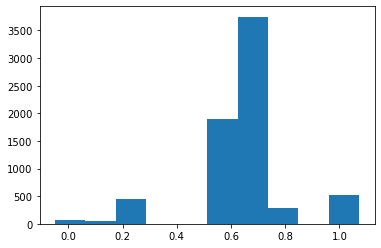

In [36]:
# plt.plot(d_copy_d['Success_probability'].index,d_copy_d['Success_probability'])
plt.hist(d_copy_d['Success_probability'].apply(lambda a:a/100), bins=10)

In [37]:
d_copy_d[(d_copy_d['Success_probability']<0)|(d_copy_d['Success_probability']>100)]['Success_probability']

20      107.34
25      107.34
48      107.34
50       -5.00
54      107.34
         ...  
6978    107.34
6980    107.34
6997    107.34
7002    107.34
7005     -5.00
Name: Success_probability, Length: 585, dtype: float64

In [38]:
d_copy_d.loc[d_copy_d['Success_probability']>100,'Success_probability']=100.0

In [39]:
d_copy_d.loc[d_copy_d['Success_probability']<0,'Success_probability']=0.0

In [40]:
Lead_revenue_uniques=d_copy_d['Lead_revenue'].value_counts().index.to_list()

In [41]:
def Lead_revenue_transform(val):
    return Lead_revenue_uniques.index(val)

In [42]:
d_copy_d['Lead_revenue']=d_copy_d['Lead_revenue'].apply(Lead_revenue_transform)
real['Lead_revenue']=real['Lead_revenue'].apply(Lead_revenue_transform)

In [43]:
def Fund_category_transform(val):
    return int(val[-1])

In [44]:
d_copy_d['Fund_category']=d_copy_d['Fund_category'].apply(Fund_category_transform)
real['Fund_category']=real['Fund_category'].apply(Fund_category_transform)

In [45]:
d_copy_d['Level_of_meeting']=d_copy_d['Level_of_meeting'].apply(Fund_category_transform)
real['Level_of_meeting']=real['Level_of_meeting'].apply(Fund_category_transform)

In [46]:
dd=pd.get_dummies(d_copy_d)

In [47]:
real_dd=pd.get_dummies(real)

In [48]:
dd.shape

(7007, 305)

In [49]:
real_dd.shape

(2093, 300)

In [50]:
set(dd.columns)-set(real_dd.columns)

{'Success_probability',
 'city_Bhagalpur',
 'city_Kota',
 'city_Mangalore',
 'city_U.S. metropolitan areas'}

In [51]:
extraCities=['city_Bhagalpur','city_Kota','city_Mangalore','city_U.S. metropolitan areas']
dd.drop(extraCities,axis=1,inplace=True)
dd.shape

(7007, 301)

# Split dataset

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train,test=train_test_split(dd,test_size=0.2)

In [54]:
train_X=train.drop('Success_probability',axis=1)
test_X=test.drop('Success_probability',axis=1)

train_y=train['Success_probability']
test_y=test['Success_probability']

## Model Building

In [55]:
import xgboost as XGB
from autokeras import StructuredDataRegressor
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [191]:
# xgb = XGB.XGBRegressor(max_depth=31,learning_rate=0.009979,
#                        n_estimators=100,
#                        n_jobs=-1,min_child_weight=5,random_state=0,
#                        gamma=1,
#                        num_parallel_tree=7)
xgb = XGB.XGBRegressor(max_depth=5,learning_rate=0.009979,
                       n_estimators=98,
                       n_jobs=-1,min_child_weight=7,random_state=0,
                       num_parallel_tree=3,
                    )

xgb.fit(train_X,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.009979, max_delta_step=0, max_depth=5,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=98, n_jobs=-1, num_parallel_tree=3, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [192]:
from sklearn.metrics import mean_squared_error as MSE

In [193]:
pred=xgb.predict(train_X)
100-np.sqrt(MSE(train_y,pred))

C:\Users\ashuy\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


71.31940822262557

In [194]:
pred=xgb.predict(test_X)
100-np.sqrt(MSE(test_y,pred))

C:\Users\ashuy\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


71.15902257900711

In [195]:
pred_r=xgb.predict(real_dd).reshape(-1)

C:\Users\ashuy\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [201]:
(pred_r+0.5).mean()

40.92376

In [197]:
pred_r[:200]=pred_r[:200]-0.5
pred_r[200:500]=pred_r[200:500]+0.65
pred_r[500:800]=pred_r[500:800]+0.5

In [187]:
sample=pd.read_csv('test.csv')

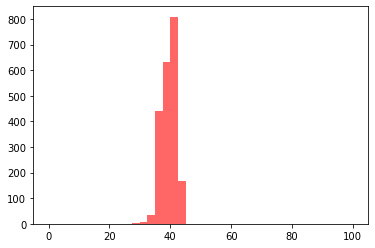

In [188]:
# a=plt.hist(samp967,bins=40,range=(0,100),color='green',alpha=0.8)

# a=plt.hist(samp9707at24,bins=40,range=(0,100),color='blue',alpha=0.5)
# a=plt.hist(best,bins=40,range=(0,100),color='red',alpha=0.5)
# a=plt.hist(best+0.1,bins=40,range=(0,100),color='yellow',alpha=0.6)
a=plt.hist(pred_r,bins=40,range=(0,100),color='red',alpha=0.6)


In [202]:
subm=pd.DataFrame([sample.Deal_title,pred_r]).T
subm.columns=['Deal_title','Success_probability']
subm.head(1)

,Deal_title,Success_probability
0,TitleAD16O,36.8257


In [203]:
subm.to_csv(f'Submission__________.csv',index=False)

#### There were some tweaks which were applied to got 97.94309 score. These tweaks include increment/decrement particular section of pred_r. These were done at that instant so not mentioned in any cell as some of these cells were overwritten after getting best score.